<a href="https://colab.research.google.com/github/Jason-Gitau/freecodecamp-LangGraph-for-beginners/blob/main/LangGraph_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Your task:

Accept a user's name, age, and a list of their skills.

Pass the state through three nodes that:

      First node: Personalizes the name field with a greeting.

      Second node: Describes the user's age.

      Third node: Lists the user's skills in a formatted string.

The final output in the result field should be a combined message in this format:

Output: "Linda, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, and LangGraph""""

SyntaxError: unterminated string literal (detected at line 15) (ipython-input-29-3906560061.py, line 15)

In [ ]:
from typing import TypedDict,List

# !pip install LangGraph

from langgraph.graph import StateGraph

In [ ]:
from typing import TypedDict

class AgentState(TypedDict):
  name:str
  age:int
  skills:List[str]
  final:str

In [ ]:
# first node
def first_node(state: AgentState) -> AgentState:
    """this is the first node"""
    state['final'] = f"{state['name']}, welcome to the system!"
    return state

# second node
def second_node(state: AgentState) -> AgentState:
    """this is the second node"""
    state['final'] += f" You are {state['age']} years old!"
    return state

# third node
def third_node(state: AgentState) -> AgentState:
    """this is the third node"""
    skills = state['skills']
    if len(skills) > 1:
        skills_str = ", ".join(skills[:-1]) + ", and " + skills[-1]
    elif len(skills) == 1:
        skills_str = skills[0]
    else:
        skills_str = ""

    state['final'] += f" You have skills in: {skills_str}."
    return state

In [ ]:
graph=StateGraph(AgentState)

graph.add_node('first node',first_node)
graph.add_node('second node',second_node)
graph.add_node('third node',third_node)

graph.set_entry_point('first node')
graph.add_edge('first node','second node')
graph.add_edge('second node','third node') # Add edge from second to third node
graph.set_finish_point('third node')

app=graph.compile()

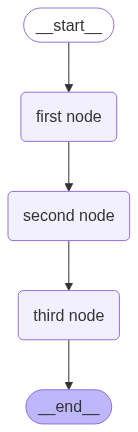

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result=app.invoke(input={'name':'Linda','age':31,'skills':['Python','Machine Learning','LangGraph']})
print(result['final'])

Linda, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, and LangGraph.
